In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# Загрузка данных
df = pd.read_csv("merged_data_for_comparing.csv")

# Переименование для удобства (если надо)
y_true = df["dimming_level"]
y_ml = df["ai_model_dimming"]
y_rule = df["simple_rules_dimming"]

In [3]:

# Вычисление ошибок
ml_error = abs(y_true - y_ml)
rule_error = abs(y_true - y_rule)

# MAE
mae_ml = mean_absolute_error(y_true, y_ml)
mae_rule = mean_absolute_error(y_true, y_rule)

# Среднее и медиана
print("=== Метрики качества ===")
print(f"MAE ML-модели: {mae_ml:.2f}")
print(f"MAE по правилам: {mae_rule:.2f}")
print(f"Среднее ML: {y_ml.mean():.2f}, Медиана ML: {y_ml.median():.2f}")
print(f"Среднее Правила: {y_rule.mean():.2f}, Медиана Правила: {y_rule.median():.2f}")

# Кто ближе к эксперту
closer_ml = (ml_error < rule_error).sum()
closer_rule = (rule_error < ml_error).sum()
equal = (rule_error == ml_error).sum()
total = len(df)

print("\n=== Близость к экспертной оценке ===")
print(f"ML ближе в {closer_ml / total * 100:.1f}% случаев")
print(f"Правила ближе в {closer_rule / total * 100:.1f}% случаев")
print(f"Одинаково близко в {equal / total * 100:.1f}% случаев")

=== Метрики качества ===
MAE ML-модели: 1.98
MAE по правилам: 12.72
Среднее ML: 36.05, Медиана ML: 43.00
Среднее Правила: 31.55, Медиана Правила: 35.00

=== Близость к экспертной оценке ===
ML ближе в 65.0% случаев
Правила ближе в 5.0% случаев
Одинаково близко в 30.0% случаев


Диагональный график scatter plot

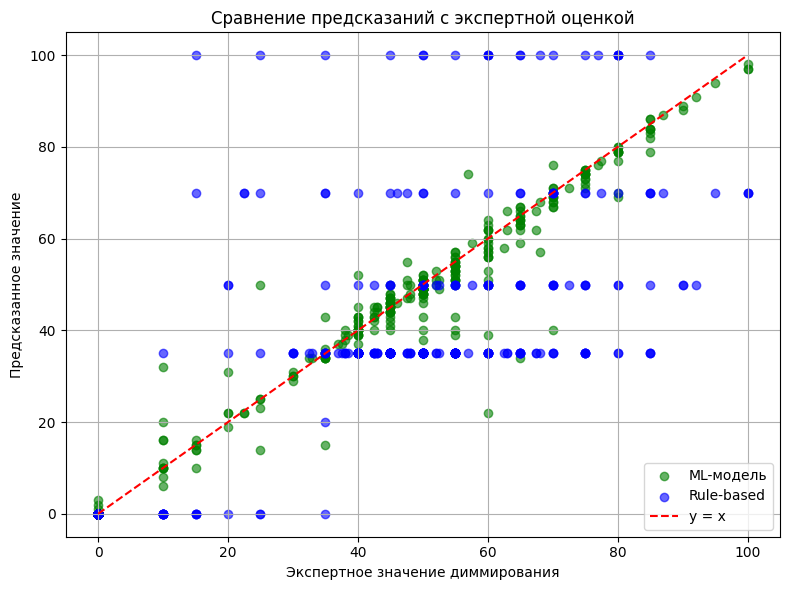

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_ml, alpha=0.6, label="ML-модель", color='green')
plt.scatter(y_true, y_rule, alpha=0.6, label="Rule-based", color='blue')
plt.plot([0, 100], [0, 100], 'r--', label="y = x")
plt.xlabel("Экспертное значение диммирования")
plt.ylabel("Предсказанное значение")
plt.title("Сравнение предсказаний с экспертной оценкой")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Boxplot ошибок двух методов

/tmp/ipykernel_142071/3362479296.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=error_df, x="Метод", y="Ошибка", palette=["green", "blue"])


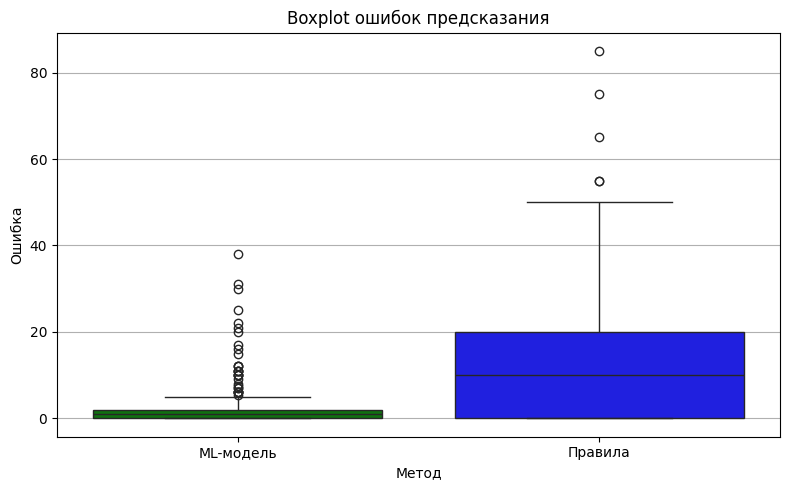

In [7]:
error_df = pd.DataFrame({
    "Ошибка": pd.concat([ml_error, rule_error], ignore_index=True),
    "Метод": ["ML-модель"] * len(ml_error) + ["Правила"] * len(rule_error)
})

plt.figure(figsize=(8, 5))
sns.boxplot(data=error_df, x="Метод", y="Ошибка", palette=["green", "blue"])
plt.title("Boxplot ошибок предсказания")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

MAE по погоде (barplot)

<Figure size 900x500 with 0 Axes>

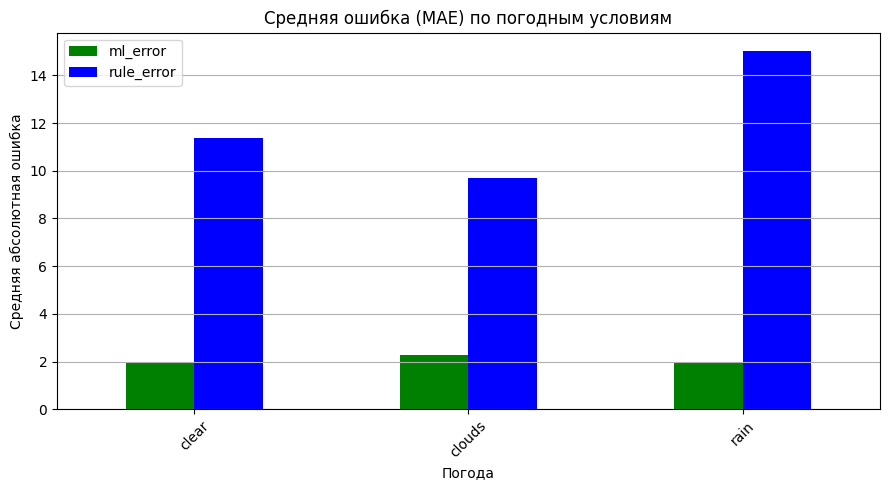

In [6]:
df["ml_error"] = ml_error
df["rule_error"] = rule_error

grouped = df.groupby("weather")[["ml_error", "rule_error"]].mean().reset_index()

plt.figure(figsize=(9, 5))
grouped.plot(x="weather", kind="bar", figsize=(9, 5), color=["green", "blue"])
plt.title("Средняя ошибка (MAE) по погодным условиям")
plt.ylabel("Средняя абсолютная ошибка")
plt.xlabel("Погода")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()